In [236]:
import requests
from pathlib import Path
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__


# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary



helper_functions.py already exists, skipping download


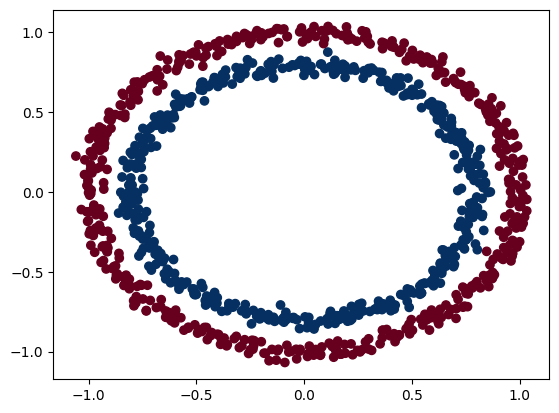

In [237]:
from torch import nn
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state=42)

X= torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)
plt.scatter(X[:,0],X[:,1], c=y, cmap = plt.cm.RdBu)


In [238]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 20)
    self.layer_2 = nn.Linear(in_features = 20, out_features = 20)
    self.layer_3 = nn.Linear(in_features = 20, out_features = 1)
    self.relu = nn.ReLU()

  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model = CircleModelV2().to(device)
print(model)


CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=20, bias=True)
  (layer_2): Linear(in_features=20, out_features=20, bias=True)
  (layer_3): Linear(in_features=20, out_features=1, bias=True)
  (relu): ReLU()
)


In [239]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc


In [240]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.1)

In [241]:
torch.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)

X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model.train()
  y_logits = model(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,y_train)

  acc = accuracy_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()

  with torch.inference_mode():
    test_logits = model(X_test).squeeze()

    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)

    test_acc = accuracy_fn(test_pred, y_test)

    if epoch %100 ==0:
       print(f'Epoch: {epoch}  | Loss: {loss: .5f} | Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%')




Epoch: 0  | Loss:  0.69448 | Accuracy: 47.62% | Test loss: 0.69197, Test acc: 54.00%
Epoch: 100  | Loss:  0.69102 | Accuracy: 53.12% | Test loss: 0.68961, Test acc: 56.50%
Epoch: 200  | Loss:  0.68750 | Accuracy: 56.88% | Test loss: 0.68704, Test acc: 57.00%
Epoch: 300  | Loss:  0.68379 | Accuracy: 59.62% | Test loss: 0.68357, Test acc: 59.50%
Epoch: 400  | Loss:  0.67821 | Accuracy: 63.12% | Test loss: 0.67807, Test acc: 63.00%
Epoch: 500  | Loss:  0.66898 | Accuracy: 69.50% | Test loss: 0.66913, Test acc: 72.00%
Epoch: 600  | Loss:  0.65292 | Accuracy: 75.38% | Test loss: 0.65433, Test acc: 77.00%
Epoch: 700  | Loss:  0.62314 | Accuracy: 85.62% | Test loss: 0.62753, Test acc: 84.00%
Epoch: 800  | Loss:  0.56539 | Accuracy: 94.62% | Test loss: 0.57623, Test acc: 94.00%
Epoch: 900  | Loss:  0.45988 | Accuracy: 99.38% | Test loss: 0.48168, Test acc: 98.00%


In [242]:
model.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model(X_test))).squeeze()


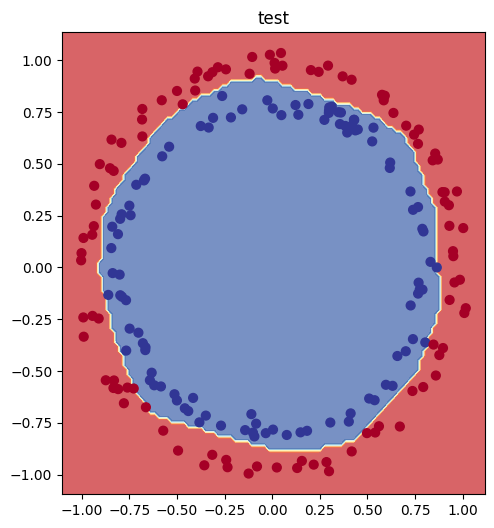

In [243]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)

plt.title("test")

plot_decision_boundary(model, X_test, y_test)

***Let see Relu and Sigmoid behaviour***


In [244]:
A = torch.arange(-10,10,1, dtype = torch.float32)



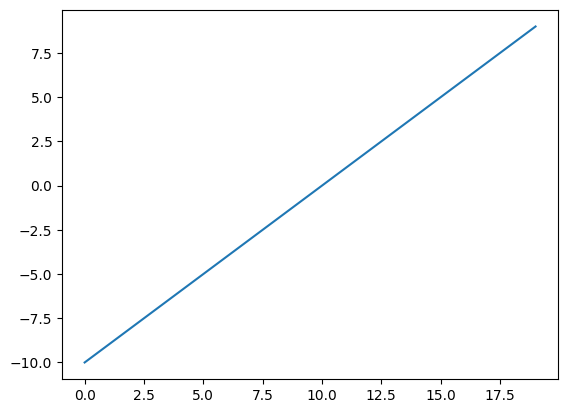

In [245]:
plt.plot(A)

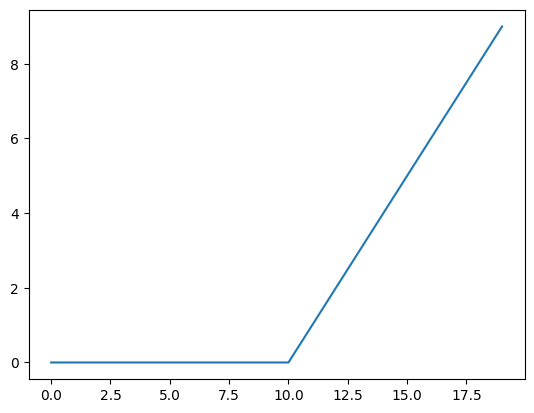

In [246]:
def relu(x):
  return torch.maximum(torch.tensor(0),x)

relu(A)
plt.plot(relu(A))

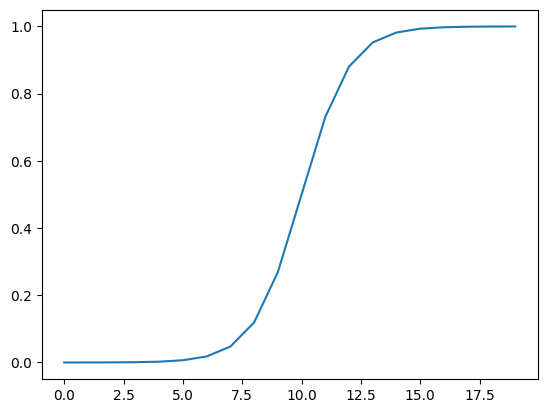

In [247]:
def sigmoid(x):
  return 1/(1+ torch.exp(-x))

plt.plot(sigmoid(A))

MULTI CLASS CLASSIFICATION


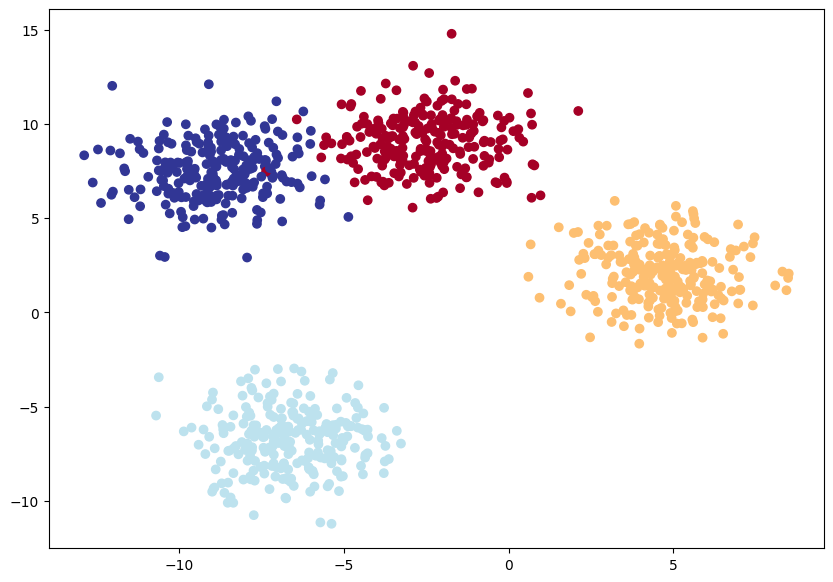

In [248]:
import torch

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features= NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.5,
                            random_state = RANDOM_SEED)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size = 0.2,
                                                                        random_state = RANDOM_SEED)

plt.figure(figsize=(10,7))

plt.scatter(X_blob[:,0],X_blob[:,1], c= y_blob, cmap = plt.cm.RdYlBu);


In [249]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'


In [250]:
from torch import nn

class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units =8):

    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features  = hidden_units, out_features = output_features)
    )
  def forward(self,x):
    return self.linear_layer_stack(x)

model4=BlobModel(input_features = NUM_FEATURES,
                 output_features = NUM_CLASSES,
                 hidden_units = 15).to(device)


model4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=15, bias=True)
    (1): ReLU()
    (2): Linear(in_features=15, out_features=15, bias=True)
    (3): ReLU()
    (4): Linear(in_features=15, out_features=4, bias=True)
  )
)

In [251]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model4.parameters(),
                            lr = 0.1)

In [252]:
model4(X_blob_train.to(device))[:5]

tensor([[-0.5853,  0.2338, -0.8509, -0.4208],
        [-0.2185, -0.1244, -0.6089, -0.3179],
        [-0.3042,  0.1255, -0.4231, -0.1594],
        [-0.3120,  0.1447, -0.2592, -0.1594],
        [-0.1377, -0.0374, -0.3235, -0.2945]], grad_fn=<SliceBackward0>)

In [253]:
y_logits = model(X_blob_test.to(device))

y_pred_probs = torch.softmax(y_logits, dim = 1)

print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-45.9670],
        [-41.5940],
        [-18.3972],
        [-27.5275],
        [-63.9197]], grad_fn=<SliceBackward0>)
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], grad_fn=<SliceBackward0>)


In [254]:
print(torch.sum(y_pred_probs[0]))

tensor(1., grad_fn=<SumBackward0>)


In [255]:
torch.manual_seed(42)

epochs = 1000

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  model4.train()

  y_logits = model4(X_blob_train)
  y_pred = torch.softmax(y_logits,dim =1).argmax(dim = 1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_blob_train,y_pred )

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model4.eval()

  with torch.inference_mode():
    test_logits = model4(X_blob_test)
    test_pred = torch.softmax(test_logits,dim =1).argmax(dim =1)
    test_loss = loss_fn(test_logits, y_blob_test)

    test_acc = accuracy_fn(y_blob_test, test_pred)

    if epoch %100 == 0:
       print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 1.35090, Acc: 26.12% | Test Loss: 1.10823, Test Acc: 75.50%
Epoch: 100 | Loss: 0.03159, Acc: 99.12% | Test Loss: 0.02295, Test Acc: 99.50%
Epoch: 200 | Loss: 0.02668, Acc: 99.12% | Test Loss: 0.01688, Test Acc: 99.50%
Epoch: 300 | Loss: 0.02535, Acc: 99.25% | Test Loss: 0.01500, Test Acc: 99.50%
Epoch: 400 | Loss: 0.02464, Acc: 99.38% | Test Loss: 0.01402, Test Acc: 99.50%
Epoch: 500 | Loss: 0.02415, Acc: 99.38% | Test Loss: 0.01337, Test Acc: 99.50%
Epoch: 600 | Loss: 0.02376, Acc: 99.38% | Test Loss: 0.01290, Test Acc: 99.50%
Epoch: 700 | Loss: 0.02342, Acc: 99.38% | Test Loss: 0.01249, Test Acc: 99.50%
Epoch: 800 | Loss: 0.02312, Acc: 99.38% | Test Loss: 0.01214, Test Acc: 99.50%
Epoch: 900 | Loss: 0.02284, Acc: 99.38% | Test Loss: 0.01183, Test Acc: 99.50%


In [256]:
model4.eval()
with torch.inference_mode():
  y_logits = model4(X_blob_test)

y_pred_probs = torch.softmax(y_logits,dim = 1)

y_preds = y_pred_probs.argmax(dim =1)
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")


Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Test accuracy: 99.5%


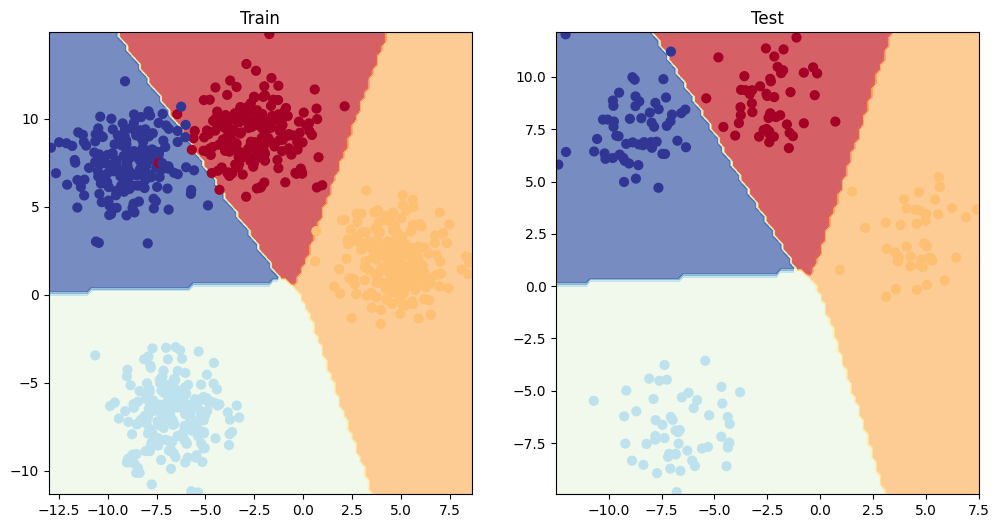

In [257]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model4, X_blob_train, y_blob_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model4, X_blob_test, y_blob_test)